In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import plotly as plt
from matplotlib.lines import *
from matplotlib.patches import *
from matplotlib.text import *
from matplotlib.image import *
import seaborn as sns
import squarify
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go #
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [ ]:
#Dirty Dataset - Part 1

In [3]:
df = pd.read_csv("Data_Analyst_Sample.csv")

In [ ]:
# Display the first 5 rows of the dataframe
print(df.head())

In [ ]:
# Display the last 5 rows of the dataframe
print(df.tail())

In [ ]:
# Display some basic statistical information about the dataframe
print(df.describe())

In [ ]:
df.shape

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

In [21]:
df = df.dropna(subset=df.select_dtypes(include=['object']).columns, how='any')

In [24]:
df.update(df[df.select_dtypes(include=['int', 'float']).columns].fillna(0))

In [ ]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(0, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
df.notnull().all()

In [ ]:
#Dirty Dataset - part 2

In [8]:

# read the errors.csv file into a dataframe
errors_df = pd.read_csv("errors.csv")

In [9]:
# read the Data_Analyst_Sample.csv file into a dataframe
data_df = pd.read_csv("Data_Analyst_Sample.csv")

In [10]:
# count the number of errors in the dataset
error_count = 0
data_df["Campaign Name"] = data_df["Campaign Name"].astype(str)
for i, row in errors_df.iterrows():
    if data_df["Campaign Name"].str.contains(row["Campaign error name"]).any():
        error_count += 1
        # use the .replace() method to correct the errors
        data_df["Campaign Name"].replace(row["Campaign error name"], row["Campaign correct"], inplace=True)

print("Number of errors found:", error_count)

Number of errors found: 4


In [ ]:
# verify the errors have been corrected
print("Errors corrected:", error_count)

In [118]:
# export the corrected "Campaign Name" column to a .csv file
data_df[["Campaign Name"]].to_csv("corrected_campaign_names.csv", index=False)

In [27]:
#Core Learning 3 - Exploratory Data Analysis (EDA)

In [3]:
# Reading the csv file and storing it in a variable named 'data'
data = pd.read_csv('./Superstore_data_sample.csv')

In [ ]:
# Exploration methods

In [ ]:
# Using the head() method to display the first 5 rows of the data
print(data.head())

In [ ]:
# Using the describe() method to display the statistical summary of the numerical columns
print(data.describe())

In [ ]:
# Using the info() method to display the information of the dataframe
print(data.info())

In [ ]:
# check the shape of the data (rows, columns)
print(data.shape)

In [ ]:
# check the columns with missing values
print(data.isnull().sum())

In [ ]:
# Data Cleaning

In [21]:
# Remove missing values from columns with object datatype
df = data.dropna(subset=data.select_dtypes(include=['object']).columns, how='any')

In [22]:
# Replace missing values with zero in columns with numeric datatype
df = df.fillna(0)

In [ ]:
# verify that there are no missing values
print(df.isnull().sum().sum()) # prints the total number of missing values in the dataframe

In [ ]:
#Core Learning 3 - Exploratory Data Analysis (EDA) - continued

In [79]:
"""
Question:
Which category (furniture, office supplies and technology) has the most products? 
and of each subcategory, how many products are there?
"""

In [4]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_csc = data.groupby(['Category', 'Sub-Category'])['Product Name'].count()

# print the result
print(grouped_csc)

Category         Sub-Category
Furniture        Bookcases        227
                 Chairs           617
                 Furnishings      956
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        216
                 Labels           364
                 Paper           1367
                 Storage          845
                 Supplies         190
Technology       Accessories      774
                 Copiers           68
                 Machines         114
                 Phones           886
Name: Product Name, dtype: int64


In [5]:
# group the 'Product Name' column by 'Category' against and find the total number of products per category
grouped_c = data.groupby(['Category'])['Product Name'].size()

# print the result
print(grouped_c)

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Product Name, dtype: int64


In [6]:
# group the 'Product Name' column by 'Sub-Category' and find the total number of products per subcategory
grouped_sc = data.groupby(['Sub-Category'])['Product Name'].count()

# print the result
print(grouped_sc)

Sub-Category
Accessories     774
Appliances      466
Art             796
Binders        1523
Bookcases       227
Chairs          617
Copiers          68
Envelopes       254
Fasteners       216
Furnishings     956
Labels          364
Machines        114
Paper          1367
Phones          886
Storage         845
Supplies        190
Tables          319
Name: Product Name, dtype: int64


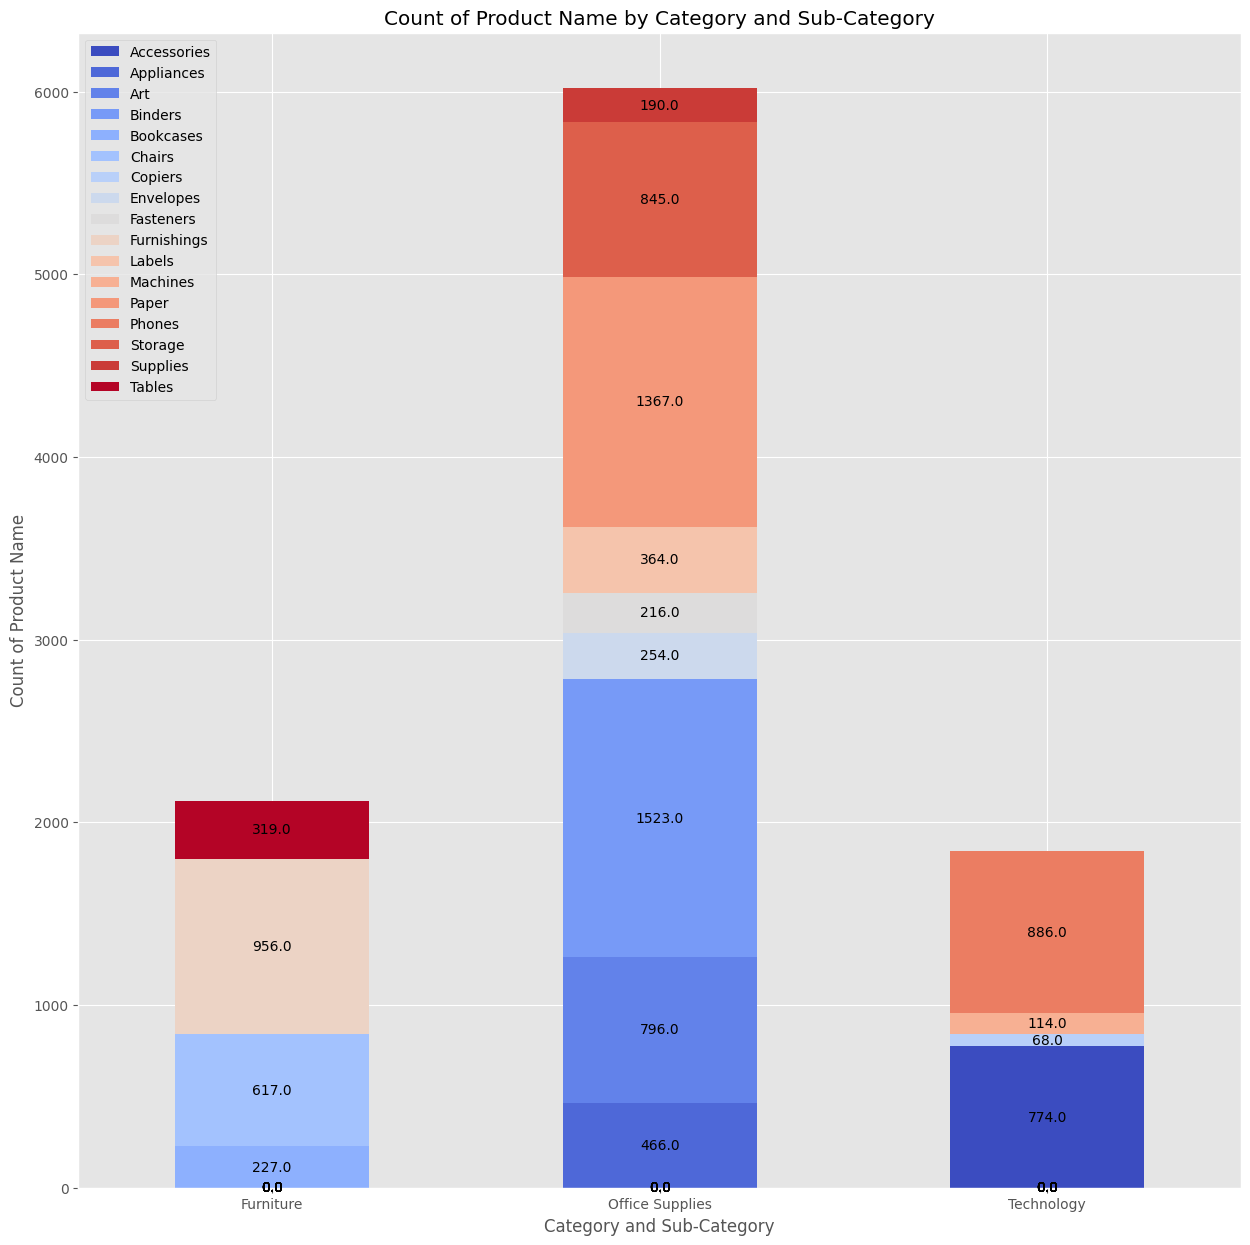

In [9]:

# Create a stacked bar chart
grouped_csc.unstack().plot(kind='bar', stacked=True, figsize=(15, 15), colormap='coolwarm')

# Find the axis of the graph
ax = plt.gca()

#selects the position of the bar on the x axis
for i in ax.containers:
    #for each stack on the x axis
    for j in i:
        #get the x and y center position of each stack and plot the values in that position
        ax.text(j.get_x() + j.get_width()/2., j.get_y() + j.get_height()/2., str(j.get_height()), 
                ha='center', va='center', rotation=0)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Category and Sub-Category')
plt.ylabel('Count of Product Name')
plt.title('Count of Product Name by Category and Sub-Category')

# change location of the legend
plt.legend(loc='upper left')

# draw the stacked bar chart
plt.show()

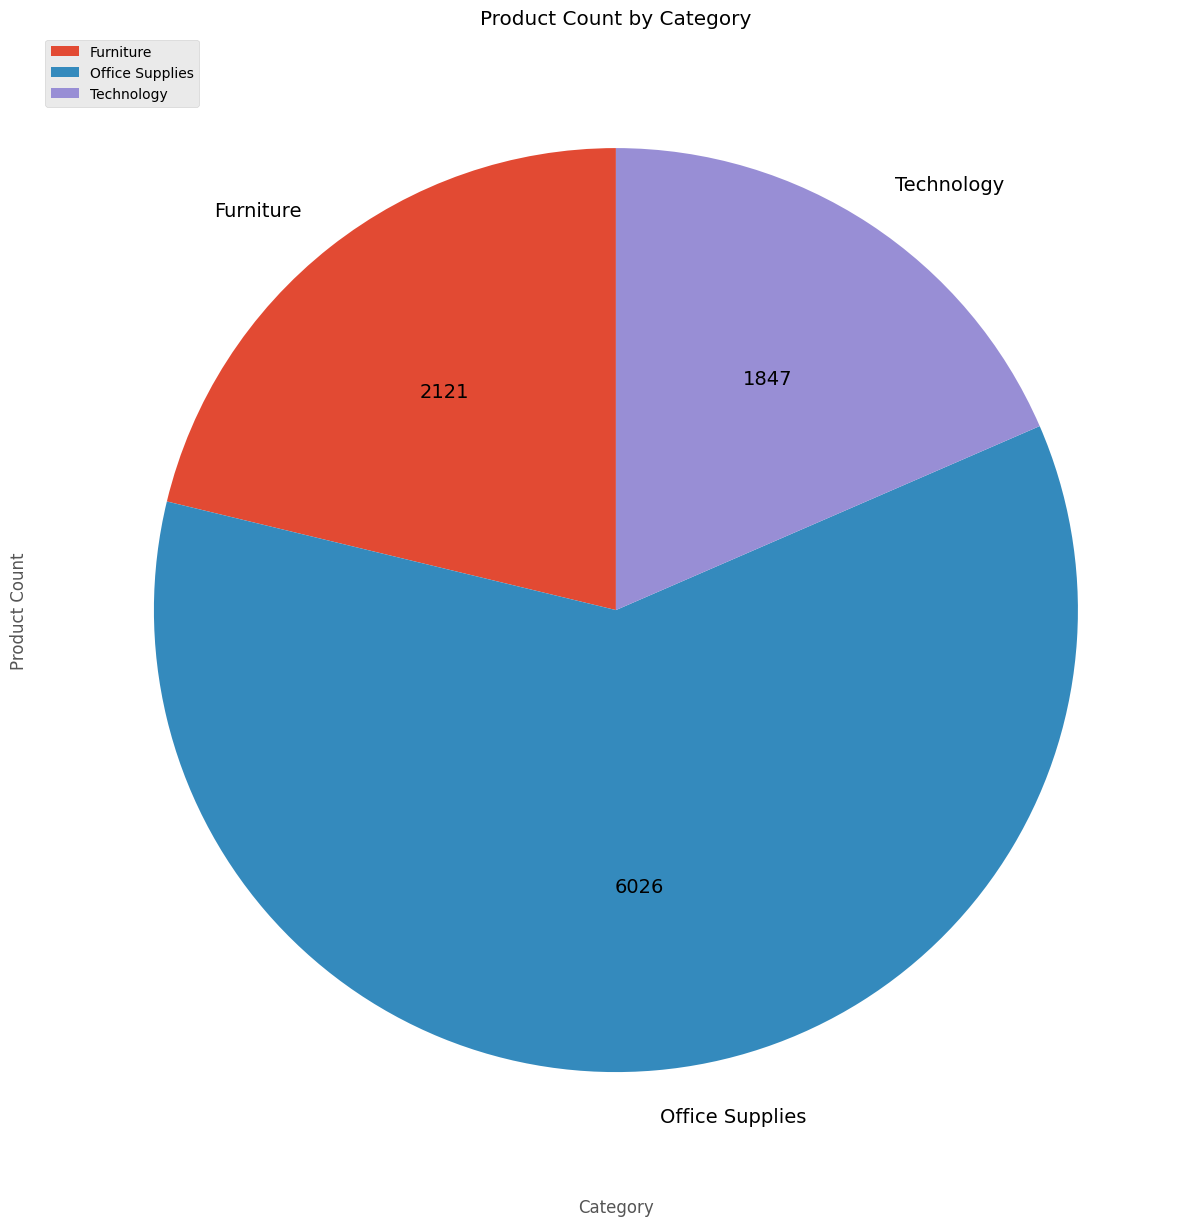

In [10]:
# create a pie chart of the product count by category
grouped_c.plot(kind='pie', labels=grouped_c.index, 
                   autopct=lambda p : '{:.0f}'.format(p * sum(grouped_c) / 100),
                   startangle=90, shadow=False, legend = False, fontsize=14, figsize=(15, 15))


# change location of the legend
plt.legend(loc='upper left')

# add a title and labels
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Product Count")

# show the chart
plt.show()


In [ ]:
"""
Answer:
The category with the most products sold:
1. "Office Supplies" with 6026 products
2. "Technology" with 1842 products 
3. "Furniture" with 2119 products.

The 
Within the "Office Supplies" category, the sub-category with the most products is "Binders" with 1523 products, followed by "Paper" with 1367 products and "Storage" with 845 products. Within the "Technology" category, the sub-category with the most products is "Phones" with 886 products, followed by "Accessories" with 774 products and "Machines" with 114 products. Within the "Furniture" category, the sub-category with the most products is "Furnishings" with 956 products, followed by "Chairs" with 617 products and "Bookcases" with 227 products.
""" 

In [11]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_two = data.groupby(['State', 'Category', 'Sub-Category'])['Sales'].sum()

In [12]:
# print the result
print(grouped_two)

State      Category         Sub-Category
Alabama    Furniture        Chairs          3915.540
                            Furnishings       40.480
                            Tables          2376.460
           Office Supplies  Appliances       208.160
                            Art              301.210
                                              ...   
Wisconsin  Office Supplies  Storage         1007.160
                            Supplies          21.810
           Technology       Accessories     4795.480
                            Phones          4002.680
Wyoming    Furniture        Chairs          1603.136
Name: Sales, Length: 656, dtype: float64


In [13]:
# Needed to check the data type of the dataset
type(grouped_two)

pandas.core.series.Series

In [14]:
# found its series so converted the series to a Dataframe
grouped_two_df = grouped_two.to_frame()

In [15]:
# unstack the sub-category level
grouped_two_df = grouped_two_df.unstack(level=-1)

In [16]:
# checking the data type of the new dataset
type(grouped_two_df)

pandas.core.frame.DataFrame

In [17]:
# print the new dataset
print(grouped_two_df)

                                    Sales                                 \
Sub-Category                  Accessories Appliances       Art   Binders   
State         Category                                                     
Alabama       Furniture               NaN        NaN       NaN       NaN   
              Office Supplies         NaN    208.160   301.210   450.080   
              Technology          2322.83        NaN       NaN       NaN   
Arizona       Furniture               NaN        NaN       NaN       NaN   
              Office Supplies         NaN    774.432  1389.152  2185.353   
...                                   ...        ...       ...       ...   
West Virginia Office Supplies         NaN        NaN       NaN    88.640   
Wisconsin     Furniture               NaN        NaN       NaN       NaN   
              Office Supplies         NaN   2710.570   159.790   588.390   
              Technology          4795.48        NaN       NaN       NaN   
Wyoming     

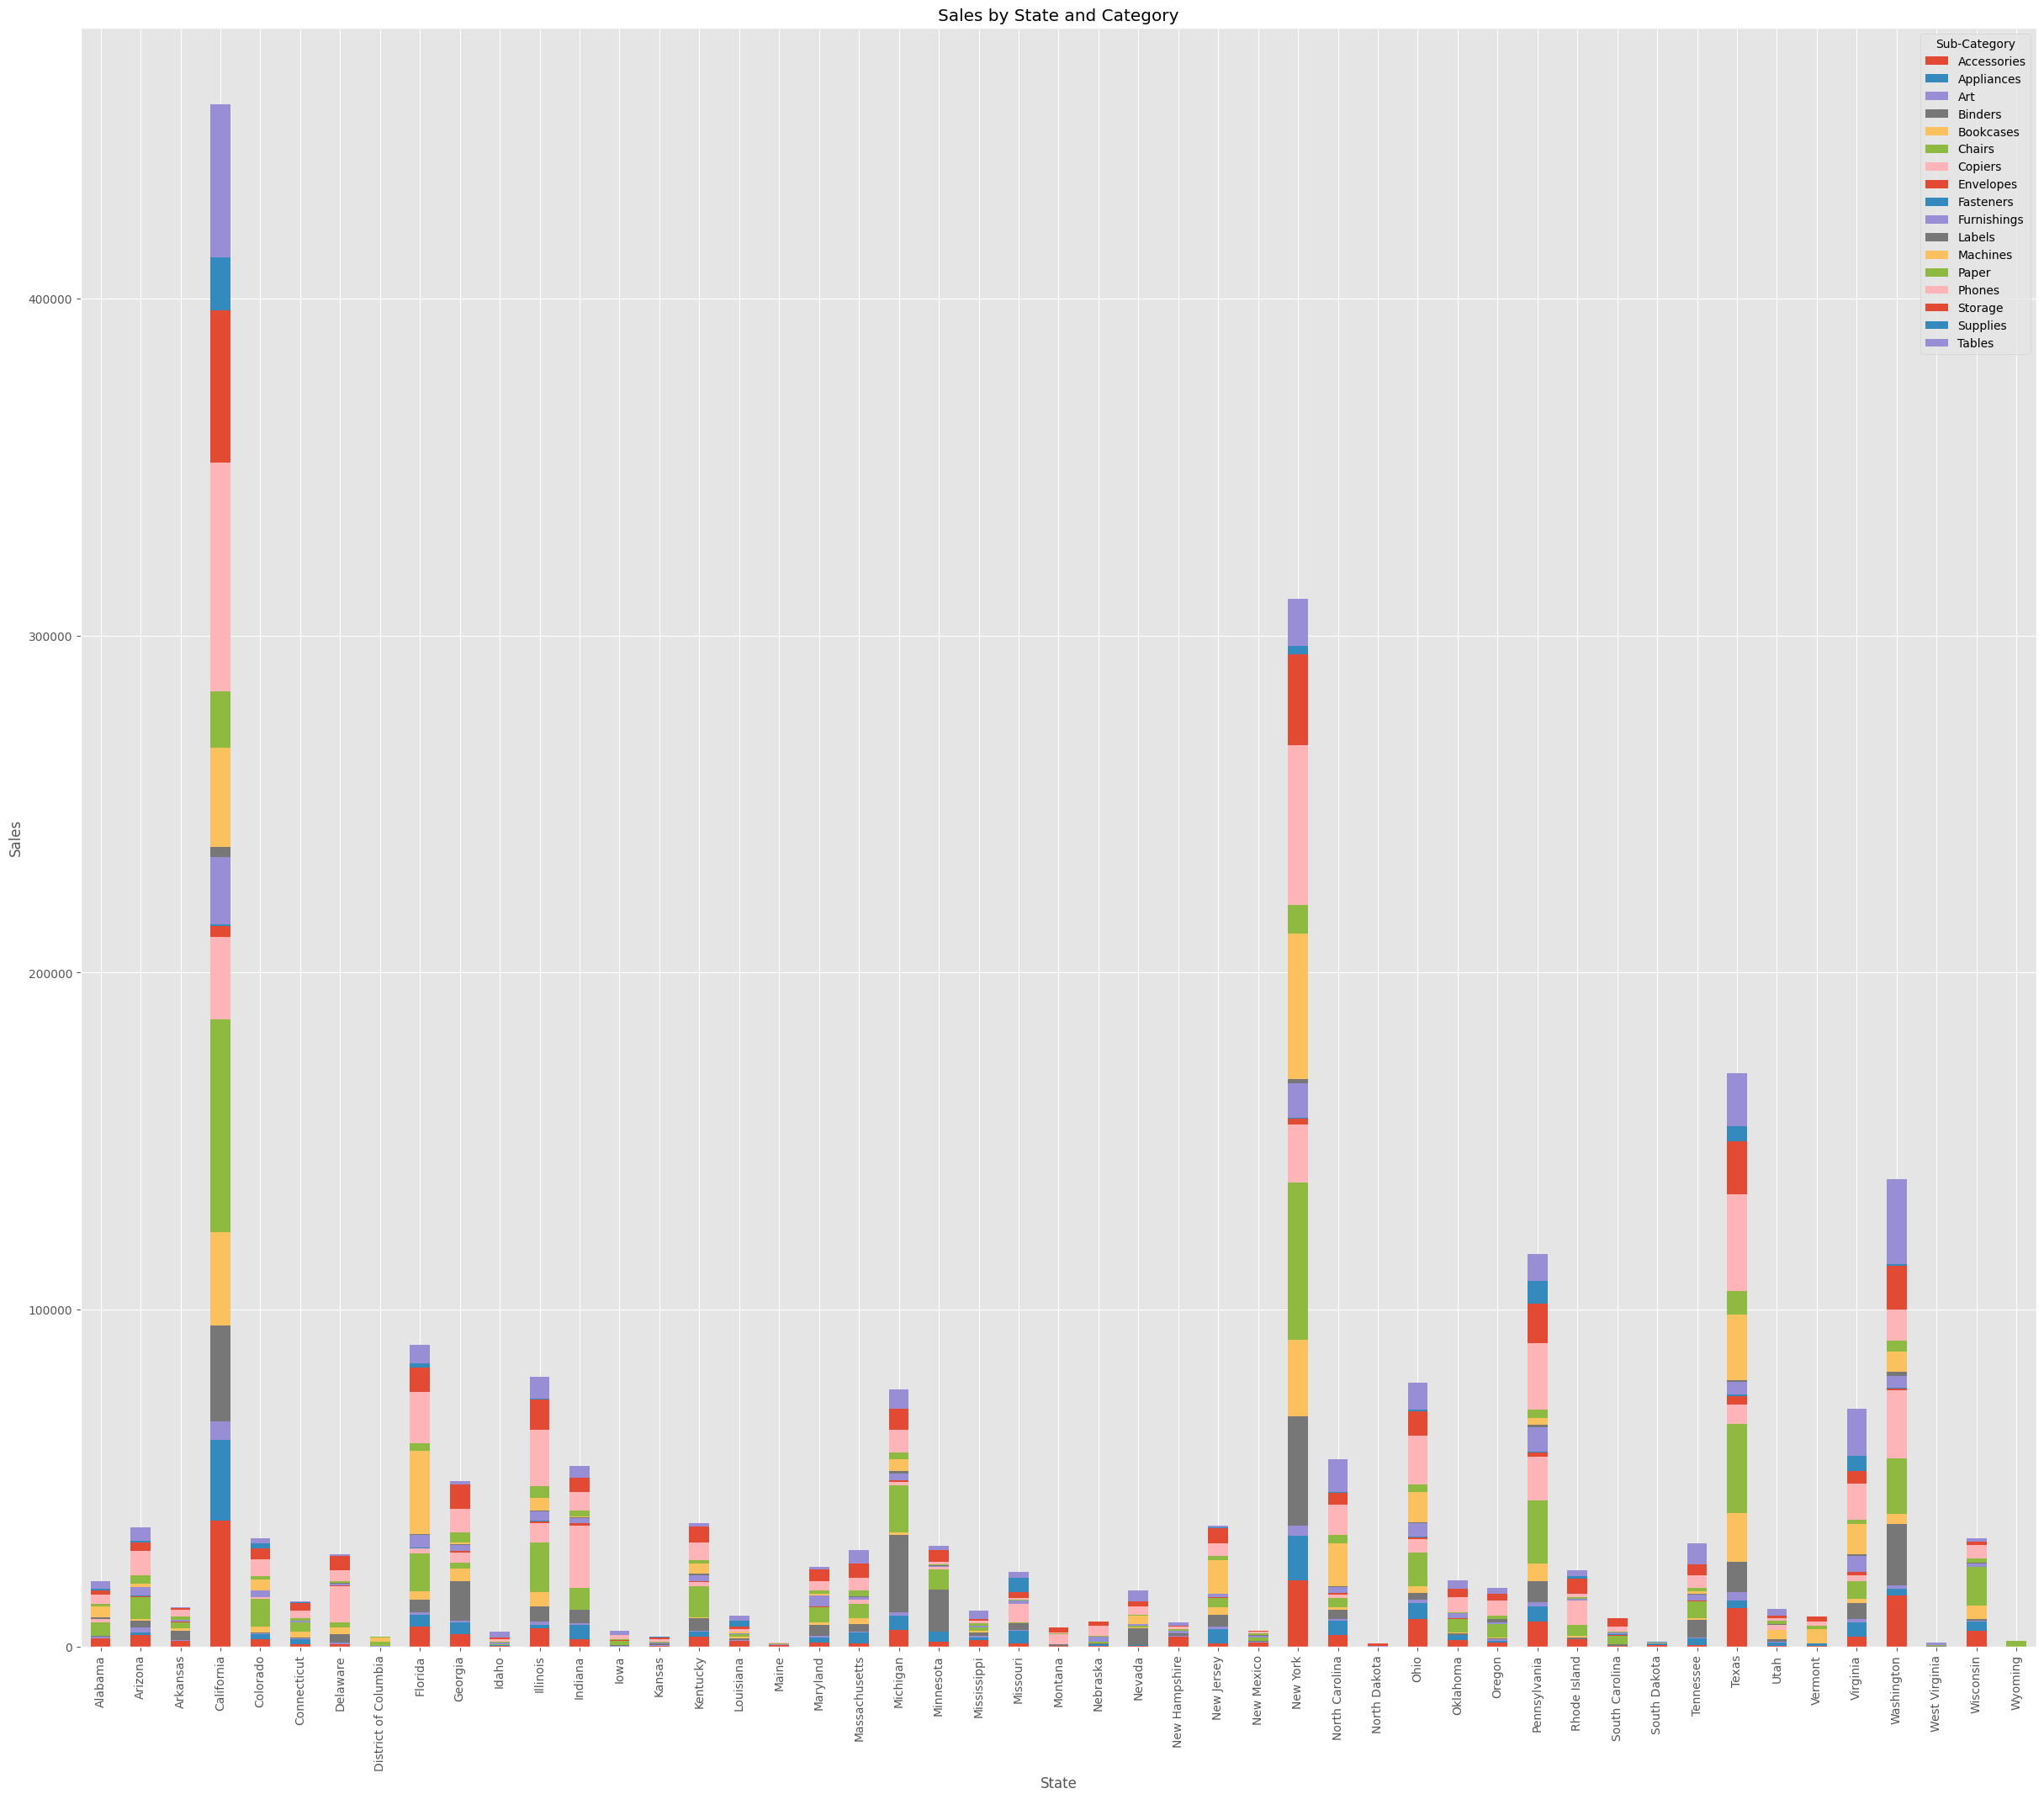

In [26]:
# create a pivot table to organize the data
pivot_table = grouped_two_df.pivot_table(values='Sales', index='State')

# plot the pivot table as a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(30, 25))

# add labels and a title
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales by State and Category')
plt.legend(title='Sub-Category')

# show the chart
plt.show()

In [30]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_s = data.groupby(['State'])['Sales'].sum()
print(grouped_s)

State
Alabama                  19493.9000
Arizona                  35282.0010
Arkansas                 11678.1300
California              457629.2515
Colorado                 32029.5180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

In [ ]:
# Random

In [31]:
# import the data file
df = pd.read_csv('Superstore_data_sample.csv')

In [32]:
# check data types
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [33]:
# check for missing values
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name    13
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name     12
Sales             5
Quantity          0
Discount          0
Profit            0
dtype: int64


In [34]:
# drop duplicate values
df = df.drop_duplicates()

In [35]:
# check for missing values
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name    13
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name     12
Sales             5
Quantity          0
Discount          0
Profit            0
dtype: int64


In [36]:
# drop unnecessary columns
df = df.drop(['Row ID','Order ID','Customer ID','Product ID'], axis=1)

In [37]:
# standardize date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [38]:
# remove outliers
df = df[df['Profit'] > 0]

In [39]:
# group data by category
category_group = df.groupby(by='Category').sum()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_35764\609645015.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_group = df.groupby(by='Category').sum()


In [40]:
# create a new column that contains the values of sales and profit as a tuple
df['Sales_Profit'] = list(zip(df.Sales, df.Profit))

In [41]:
# reshape the dataframe in long format
df = pd.melt(df, id_vars=['Category'], value_vars=['Sales', 'Profit'], var_name='sales_profit', value_name='value')

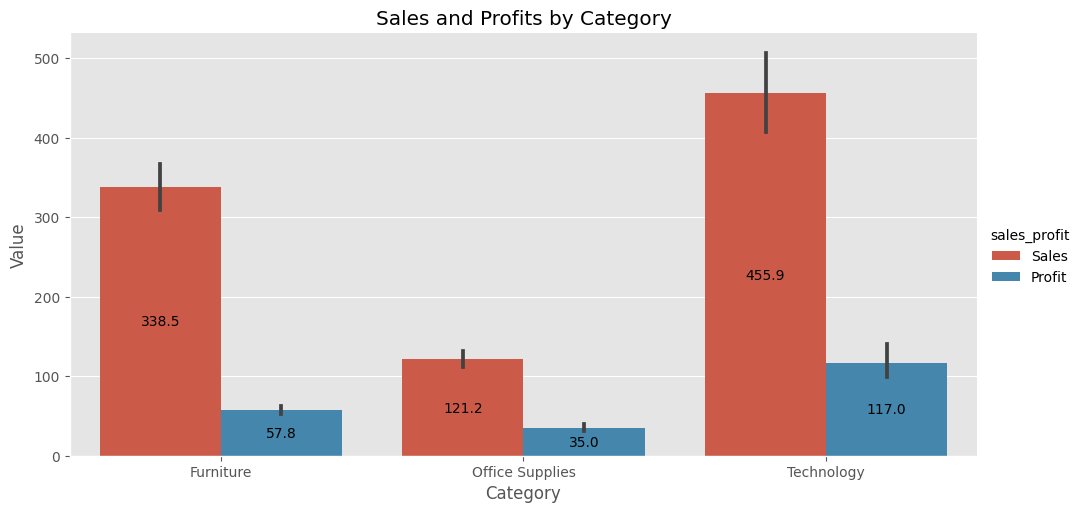

In [42]:
# create a catplot
g = sns.catplot(x='Category', y='value', hue='sales_profit', kind='bar', data=df, height=5, aspect=2)

# add title and labels
plt.title("Sales and Profits by Category")
plt.xlabel("Category")
plt.ylabel("Value")

# add y values on top of each bar and round it to the nearest .0
for i in g.ax.containers:
    for j in i:
        g.ax.text(j.get_x() + j.get_width()/2., j.get_height()/2-10, round(j.get_height(),1), ha='center', va='bottom')

# show the plot
plt.show()